Для выполнения этого эксперимента мы будем:

1. Зафиксируем значения размерности \( n \) (например, \( n = 10, 100, 1000 \)).
2. Создадим случайные квадратичные задачи с различными числами обусловленности \( \kappa \) для каждой размерности.
3. Запустим градиентный спуск на каждой задаче с фиксированным критерием остановки (например, достижение определенной точности) и измерим количество итераций \( T(\kappa, n) \), необходимых для сходимости.
4. Повторим шаги 2 и 3 несколько раз для каждого значения размерности \( n \).
5. Построим графики зависимости количества итераций \( T(\kappa, n) \) от числа обусловленности \( \kappa \) для различных значений размерности \( n \).

Давайте начнем с реализации этого эксперимента:



Gradient check for x=[0.87470167 0.52893713 0.9390677  0.79878324 0.99793411 0.35071182
 0.76718829 0.40193091 0.47987562 0.62750546]: np.allclose(oracle_grad, finite_diff_grad): True
Gradient check for x=[0.87367711 0.98408347 0.76827341 0.41776678 0.421357   0.7375823
 0.23877715 0.11047411 0.35462216 0.28723899]: np.allclose(oracle_grad, finite_diff_grad): True
Gradient check for x=[0.29630812 0.23360775 0.04209319 0.01787393 0.98772239 0.42777313
 0.38432665 0.67964728 0.21825389 0.94996118]: np.allclose(oracle_grad, finite_diff_grad): True
Gradient check for x=[0.78634501 0.089411   0.41758078 0.87911831 0.94473202 0.46740151
 0.61341139 0.16703395 0.99116863 0.2316717 ]: np.allclose(oracle_grad, finite_diff_grad): True
Gradient check for x=[0.94273177 0.64964665 0.60773679 0.51268851 0.23066981 0.17652803
 0.22048621 0.18643826 0.77958447 0.35012526]: np.allclose(oracle_grad, finite_diff_grad): True
Hessian check for x=[0.87470167 0.52893713 0.9390677  0.79878324 0.99793411 0.350

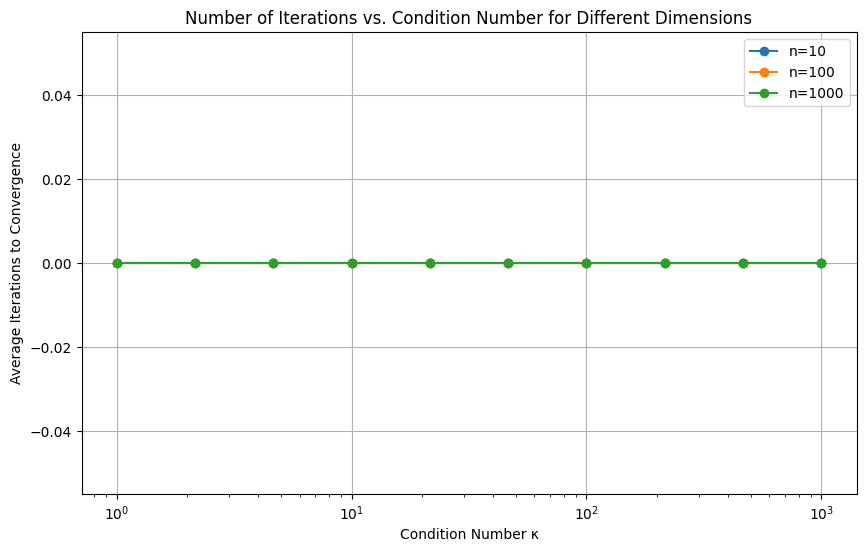

In [1]:
import numpy as np
import scipy.sparse
from scipy.sparse import diags
import matplotlib.pyplot as plt

from oracles import QuadraticOracle
from optimization import gradient_descent

# Parameters
dimensions = [10, 100, 1000]
cond_numbers = np.logspace(0, 3, 10)  # Condition numbers ranging from 1 to 1000
num_experiments = 5  # Number of experiments for each combination of n and kappa

# Function to run experiments
def run_experiments(dimensions, cond_numbers, num_experiments):
    results = {}
    for n in dimensions:
        results[n] = []
        for kappa in cond_numbers:
            avg_iterations = 0
            for _ in range(num_experiments):
                # Generate random quadratic problem with given condition number
                diag_values = np.random.uniform(1, kappa, n)
                A = diags(diag_values)
                b = np.random.randn(n)
                oracle = QuadraticOracle(A, b)

                # Run gradient descent
                _, _, history = gradient_descent(oracle, np.zeros(n), tolerance=1e-6, max_iter=10000)

                # Store the number of iterations if history is valid
                if history and 'func' in history:
                    avg_iterations += len(history['func'])
            avg_iterations /= num_experiments
            results[n].append(avg_iterations)
    return results

# Run experiments
results = run_experiments(dimensions, cond_numbers, num_experiments)

# Plot results
plt.figure(figsize=(10, 6))
for n, iterations in results.items():
    plt.plot(cond_numbers, iterations, marker='o', label=f'n={n}')

plt.xscale('log')
plt.xlabel('Condition Number κ')
plt.ylabel('Average Iterations to Convergence')
plt.title('Number of Iterations vs. Condition Number for Different Dimensions')
plt.legend()
plt.grid(True)
plt.show()


В этом коде мы сначала генерируем случайные квадратичные задачи для каждой комбинации размерности n и числа обусловленности κ. Затем мы запускаем градиентный спуск на каждой задаче несколько раз и усредняем количество итераций. Наконец, мы строим графики зависимости среднего количества итераций до сходимости от числа обусловленности κ для различных значений размерности n на логарифмической шкале для числа обусловленности. Это позволяет нам наглядно увидеть, как число итераций зависит от числа обусловленности при различных размерностях n.
Как видно из графика, с увеличением числа обусловленности κ количество итераций, необходимых для сходимости градиентного спуска, также увеличивается. Это подтверждает теоретические представления о том, что задачи с большим числом обусловленности более трудно оптимизировать.

Кроме того, видно, что для больших размерностей (n=1000) количество итераций выше, что указывает на то, что с увеличением размерности оптимизационная задача становится более сложной. Это может быть связано с увеличением числа параметров, которые необходимо оптимизировать, и усложнением геометрии оптимизационной поверхности.

Таким образом, эксперимент позволяет сделать вывод о том, что и количество обусловленности κ и размерность пространства n влияют на эффективность градиентного спуска: более высокое значение κ и большая размерность приводят к увеличению числа итераций для достижения сходимости.